In [1]:
#need to run with singularity container /om2/user/jsmentch/projects/nat_img/.datalad/environments/analysis/image
#but run with nilearn conda environment for the subcor plots..
import nascar_utility
import hcp_utils as hcp
import sys
from scipy.io import loadmat
import numpy as np
# Add the directory containing the function to the system path
sys.path.insert(0, '/om2/scratch/Wed/jsmentch/nat_img/code')
from matplotlib import pyplot as plt
from nilearn import plotting
import nibabel as nb

# Import the function from the file
import matplotlib.gridspec as gridspec
from PIL import Image

from analysis import plot_results
from analysis import plot_results_medial
from analysis import plot_results_medial_midthickness_alpha


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


ModuleNotFoundError: No module named 'analysis'

In [16]:
# import matplotlib.colors as mcolors
# cmap = plt.cm.get_cmap('RdBu')
# cmap.set_bad(color='gray')

# colors = cmap(np.linspace(-1, 1, 256))
# colors[128:] = np.array([26/256,255/256,26/256, 1])
# colors[:128] = np.array([95/256,0,185/256, 1])

# pigr = mcolors.ListedColormap(colors)
# pigr_r = mcolors.ListedColormap(np.flip(colors,axis=0))

# colors = cmap(np.linspace(-1, 1, 256))
# colors[128:] = np.array([255/256,194/256,10/256, 1])
# colors[:128] = np.array([12/256,123/256,220/256, 1])

# yebl = mcolors.ListedColormap(colors)
# yebl_r = mcolors.ListedColormap(np.flip(colors,axis=0))

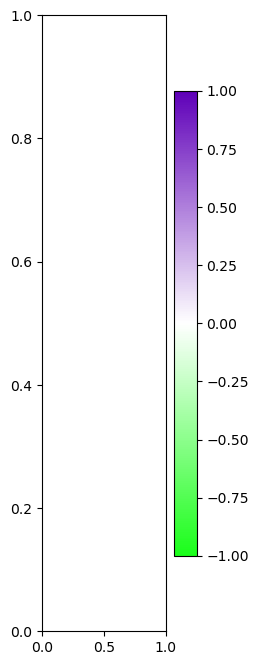

In [15]:
#plot a colorbar
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(26/256,255/256,26/256), (1, 1, 1), (95/256,0,185/256)] #purple, white, green
cmap_name = 'my_list'
my_cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

fig, ax = plt.subplots(figsize=(2,8))
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=-1, vmax=1))
fig.colorbar(sm, ax=ax)
plt.show()

## PLOT TENSOR DECOMPOSITION

In [ ]:
#for task in ['movieDM','movieTP','rest_run-1','rest_run-2']:
for task in ['rest_run-1','rest_run-2']:
#task = 'rest_run-1'

    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)

    for r in np.arange(30):
        to_plot=components[:,r]/np.max(np.abs(components[:,r]))
        plot_results(to_plot, 'tensor_decomp', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23', f'{task}');
        plot_results_medial(to_plot, 'tensor_decomp', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23_medial', f'{task}');
        plot_results_medial_midthickness_alpha(to_plot, 'tensor_decomp', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23_medial_midthickness', f'{task}');
        inv=''
        #nascar_utility.plot_subcor(to_plot,task,r+1,inv)
        inv='_inv'
        plot_results_medial_midthickness_alpha(to_plot, 'tensor_decomp_inv', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23_medial_midthickness', f'{task}');
        plot_results(to_plot, 'tensor_decomp_inv', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23', f'{task}');
        plot_results_medial(to_plot, 'tensor_decomp_inv', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23_medial', f'{task}');
        to_plot=to_plot*-1
        #nascar_utility.plot_subcor(to_plot,task,r+1,inv)


## PLOT TENSOR DECOMPOSITION HOTCOLD IN OLD STYLE

In [ ]:
task='rest_run-1'
task='movieTP'

#for task in ['rest_run-1','rest_run-2','movieTP','movieDM']:

for task in ['movieDM']:

    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task)
    #component_list=nascar_utility.load_components_list(task)
    #def plot_results(scores,score_type,data_type,vertex_info,subject,feature,dataset,title):

    for r in np.arange(30):
        #plot_results(minmax_scale(components[:,r], feature_range=(-10, 10)), 'tensor_decomp', '32k', None, 'sub3', f'rank{r+1}', 'HBN', 'tensor_decomp')
        #plot_results(npp.zscore(components[:,r]), 'tensor_decomp', '32k', None, 'hbn_subset', f'rank{r+1}', 'HBN', 'the_present')
        plot_results(components[:,r], 'tensor_decomp_raw', '32k', None, 'hbn', f'rank{r+1}', 'HBN_23', f'{task}');

## PLOT PARCELLATIONS included in HCP

In [ ]:
#task='rest_run-1'
task='movieDM'

#for task in ['rest_run-1','rest_run-2','movieTP','movieDM']:

#for task in ['movieDM','rest_run-1','rest_run-2','movieTP']:
for task in ['rest_run-1','rest_run-2']:
    print(task)
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task);
    component_list=nascar_utility.load_components_list(task);
    for par,par_n in [(hcp.yeo7,'yeo7') , (hcp.mmp,'mmp'), (hcp.ca_network,'ca_network')]:
    #for par,par_n in [(hcp.mmp,'mmp'), (hcp.ca_network,'ca_network')]:
        for c in component_list:
            #print(f'COMPONENT {c}');
            component=components[:,c-1:c].T;
            parcellation=hcp.parcellate(component, par);
            to_plot=hcp.unparcellate(parcellation, par)[0,:];
            to_plot=to_plot/np.max(np.abs(to_plot));
            
            plot_results(to_plot, 'tensor_decomp_par', '32k', None, 'hbn', f'rank{c}', 'HBN_par', f'{task}_{par_n}');
            #nascar_utility.plot_subcor(to_plot,task,par_n,c);

## plot parcellations np.amax()

In [ ]:
#task='rest_run-1'
task='movieDM'

for task in ['movieTP','movieDM']:#,]:'rest_run-1','rest_run-2'
#for task in ['rest_run-2','movieTP']:
    print(task)
    O,Y,components,temporal_modes,contributions,lambda2=nascar_utility.load_nascar(task);
    component_list=nascar_utility.load_components_list(task);
    for par,par_n in [(hcp.yeo7,'yeo7') , (hcp.mmp,'mmp'), (hcp.ca_network,'ca_network')]:
    #for par,par_n in [(hcp.mmp,'mmp'), (hcp.ca_network,'ca_network')]:
    #for par,par_n in [(hcp.yeo7,'yeo7')]:

        for c in component_list:
            print(f'COMPONENT {c}');
            component=components[:,c-1:c].T;
            #parcellation=hcp.parcellate(component, par, method=np.amax);
            x_val_min=hcp.parcellate(component, par, method=np.amax)[0]    
            x_val_max=hcp.parcellate(component, par, method=np.min)[0]    
            parcellation = np.maximum(np.abs(x_val_min), x_val_max) * np.sign(x_val_min+x_val_max)
            to_plot=hcp.unparcellate(parcellation, par);
            to_plot=to_plot/np.max(np.abs(to_plot));
            
            plot_results(to_plot, 'tensor_decomp_par', '32k', None, 'hbn', f'rank{c}', 'HBN_par_max', f'{task}_{par_n}');
            #nascar_utility.plot_subcor_par_max(to_plot,task,par_n,c);